Enligt källan https://www.kaggle.com/datasets/camnugent/california-housing-prices
så är datat detta och inte rensat så det är mycket troligt att det finns konstigheter i det

**About this file**
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

**What do the columns say**
* column 3, 4, 5, 6, 7, 8 and 9 is a measurement / block
* column 1, 2 and 10 is a measurement / household

**So if we are talking about set theory:**
* We have California which i the whole set.
* In California we have a number of blocks.
* In each block we have a number of households.
* For each household we have longitude, latitude and a proximity to the ocean.

**Reflections**
* column 4, 5 and 6 could be divided by column 7 to get the mean value but that is not robust in statistics because of small and big values (outliers). The other values are median values so I will not be using that because of mixing mean and median values. 

In [1]:
import pandas as pd

# load the data
housing = pd.read_csv("housing.csv")

# Do we have any null values
print(housing.shape)
print(housing.info())

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [2]:
# total_bedrooms has 207 null values which is not much. So let us remove these rows so we don't have any null values
# The data set is small for this case so I will use inplace = True (I would not do this if it affects the original data)
housing.dropna(inplace=True)
print(housing.shape)
print(housing.info())

(20433, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


In [3]:
# Check if there is any duplicate rows
housing[housing.duplicated(keep=False)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [4]:
# No unique duplicates on the whole rows

# I want to change ocean proximity to numbers instead. So Lets see what it contains
values_count = housing['ocean_proximity'].value_counts()
print(values_count)

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


In [5]:
# Change ocean_proximity values. I will assign a number for each unique value and in this order
# INLAND = 0, <1H OCEAN = 1, NEAR BAY = 2, NEAR OCEAN = 3, ISLAND = 4
# I have tried to ordered these values after what I think is how close it is to water and that close to the ocean is more expensive. 
# I was thinking of removing island values because there is only 5 values
housing["ocean_proximity_value"] = housing["ocean_proximity"].map({"INLAND": 0, "<1H OCEAN": 1, "NEAR BAY": 2, "NEAR OCEAN": 3, "ISLAND": 4})

In [6]:
# Take an initial look on the data
print(housing.describe())
housing

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [7]:
# Let see what linear correlation we have between values in the data
# +1 = perfect linear correlation
# 0 = no linear correlation
# -1 = perfect negative linear correlation

housing_only_numeric_dtype = housing.select_dtypes(include=['number'])
housing_only_numeric_dtype = housing_only_numeric_dtype[housing_only_numeric_dtype.ocean_proximity_value != 4]
housing_only_numeric_dtype.corr().style.background_gradient(cmap='Blues')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_value
longitude,1.000000,-0.924628,-0.109556,0.045555,0.069653,0.100380,0.056604,-0.015464,-0.045642,-0.095342
latitude,-0.924628,1.000000,0.012192,-0.036799,-0.067066,-0.109193,-0.071939,-0.079796,-0.144312,-0.163710
housing_median_age,-0.109556,0.012192,1.000000,-0.360634,-0.320486,-0.295715,-0.302714,-0.118191,0.106077,0.211164
total_rooms,0.045555,-0.036799,-0.360634,1.000000,0.930382,0.857273,0.918987,0.197822,0.133516,-0.026366
total_bedrooms,0.069653,-0.067066,-0.320486,0.930382,1.000000,0.877758,0.979740,-0.007767,0.049792,-0.002870
population,0.100380,-0.109193,-0.295715,0.857273,0.877758,1.000000,0.907177,0.004989,-0.025069,-0.026737
households,0.056604,-0.071939,-0.302714,0.918987,0.979740,0.907177,1.000000,0.013350,0.065122,0.016162
median_income,-0.015464,-0.079796,-0.118191,0.197822,-0.007767,0.004989,0.013350,1.000000,0.688848,0.151272
median_house_value,-0.045642,-0.144312,0.106077,0.133516,0.049792,-0.025069,0.065122,0.688848,1.000000,0.381769
ocean_proximity_value,-0.095342,-0.163710,0.211164,-0.026366,-0.002870,-0.026737,0.016162,0.151272,0.381769,1.000000


## Points from the correlation table

My understanding is that to have a "good" correlation at leasta value around 0.6 or -0.6 should be found.
If the value goes closer to 0 in each case then it should not be that good of a correlation value. It will be hard to tell/predict if the values will follow eachother.

## Interpretion of the values from the table

**The dark blue box in the middle**
1. All these values are close to the value 1. So these have a strong correlation between eachother.
2. The total rooms and total bedrooms follow eachother which probably indicate that maybe most rooms are bedrooms and with more rooms we get more bedrooms.
3. The total rooms and population also increase with eachother. If the population goes up the number of bedrooms should increase.
4. The total rooms and number of households also follow eachother. if the number of households increase it will also increase the number of rooms.
5. total bedrooms and population also increase with eachother.
6. total bedrooms and households also increase with each other.
7. population and households have a similar relation with eachother.
8. I don't think it is really nothing strange with this. These values are strongly related to eachother. If the poulation increase all the other values as households, rooms and bedrooms vill increase.

**Other points**
1. Correlation between latitude and longitude. It says if one of them decrease the other should also decrese. The only thing for this that I could guess is that where all these houses are located is from northwest downwards to southeast. It probably maps to the geography of the coast of the land or similar.
2. the median house price is also related to the house value. Probably the more money the household has the more expensive the house is.

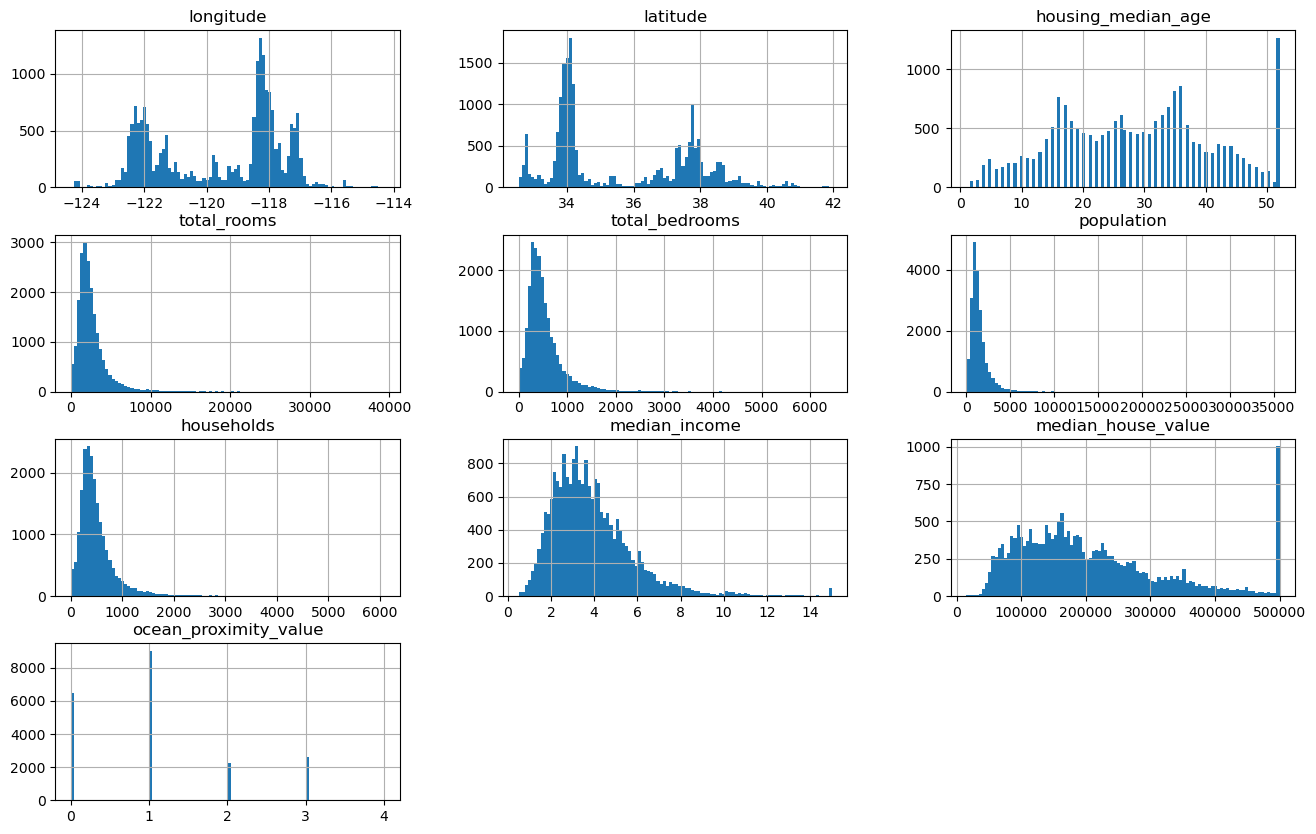

In [8]:
# Lets do some histograms of the housing data
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(16,10))
plt.show()

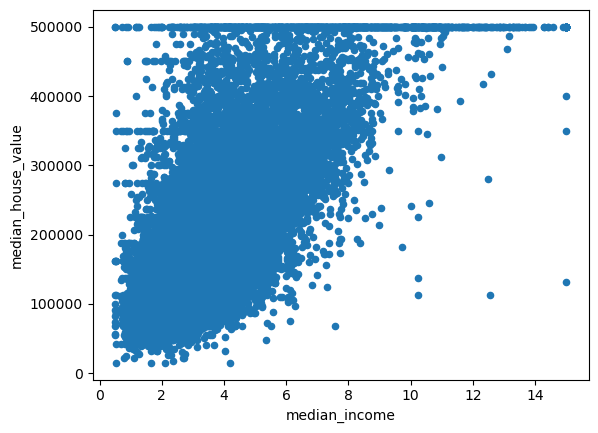

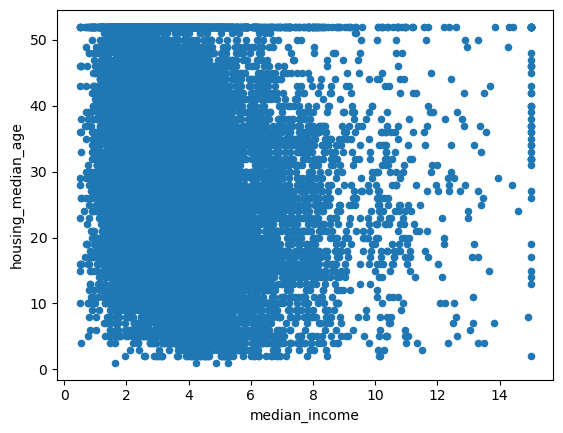

In [9]:
# housing_median_age and median_house_value seems to be capped at 52 and 500000 respectively.
# Even median_income seem to have a tendency to be a bit capped at 15
# Lets do some scatter plots to look if we can see anything

housing.plot(kind="scatter", x="median_income",y="median_house_value")
housing.plot(kind="scatter", x="median_income",y="housing_median_age")
plt.show()

In [ ]:
# Above I think it is visible that we have lines at the max values. 
# We can see that the values is the same as in the 'housing.describe()' max value earlier above 
# Also median_house_value and median_income show a strong linear correlated

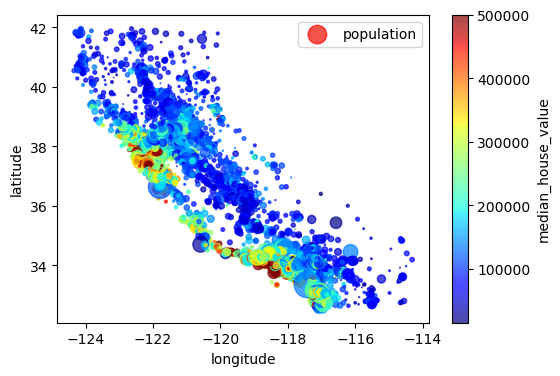

In [10]:
# For fun let us also look into the latitude/longitude relation but also show the house median value as a color
# between blue and red where red is more expensive. The size of the plot is also related to how popuated the area is
housing.plot(kind="scatter", x="longitude", y="latitude", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(6,4), s=housing['population']/100, label="population", alpha=0.7)
plt.show()

In [ ]:
# The observation from before regarding the longitude and latitude can be seen here.
# We can also see that the more expensive areas are closer to the ocean (more red/yellow areas)
# The more expensive areas are also more together

1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?
   Det är nytt för mig att göra en EDA. Sen var det väldigt fria ramar. Det skulle kunna gå åt vilket håll som helst.
   Det sätt jag har försökt hantera det på är att på ett strukturerat sätt förklara den datan som finns. Använda ett verktyg för att undersöka datan.
   Och sen varför jag valt att ta de val som jag har gjort baserat de resultat som kommer fram. Även min förståelse för bostadsmarknaden, chatGPT
   och andra internetkäller för inspiration har använts. Jag har försökt att tänka och göra saker själv så mycket som möjligt innan googlande mm.
3. Vilket betyg anser du att du ska ha och varför?
   Det är lite svårt att säga tycker jag. Jag har jobbat självständigt och tagit egna beslut för att komma fram till det jag har.
   Programmering är en stark sida hos mig så det har varit enkelt tycker jag. Jag är van att ta eget ansvar i mitt yrkesliv med men det
   jag kan ha missat här är att ha gjort en dålig EDA, misstolkat data, missat felaktig data mm. Eftersom jag inte har så mycket erfarenhet av
   det så blir det svårt att säga. Jag kan säga VG men om jag får G så går inte världen under för mig. Jag är mest här för att lära mig.
   Så länge jag blir godkänd så är jag nöjd :)
5. Något du vill lyfta fram till Antonio?
   Nej inget speciellt. Det var en rolig uppgift där jag fick tänka efter en hel del vad jag håller på med.